https://www.tensorflow.org/tutorials/quickstart/beginner

In [82]:
import tensorflow as tf

In [83]:
mnist = tf.keras.datasets.mnist

In [84]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
norm = 255.0 # tf.math.reduce_max(x_train)=255
x_train, x_test = x_train / norm, x_test / norm

In [85]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

In [86]:
predictions = model(x_train[:1]).numpy()
predictions


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



array([[-6.8300635e-02, -7.6133418e-01, -2.7256083e-01, -3.6117610e-01,
         3.1987339e-02, -1.4481018e-01,  2.4532688e-01,  7.3312646e-01,
        -8.3416700e-05, -1.5838772e-01]], dtype=float32)

In [87]:
tf.nn.softmax(predictions).numpy()


array([[0.09367853, 0.04684459, 0.07637145, 0.06989496, 0.10356061,
        0.08677855, 0.12818782, 0.20878315, 0.10029204, 0.08560827]],
      dtype=float32)

In [88]:
tf.argmax(tf.nn.softmax(predictions),axis=1)

<tf.Tensor: shape=(1,), dtype=int64, numpy=array([7])>

In [ ]:
## The last number in the previous result is the models' guess.
## probably wrong since the model hasn't been trained yet

In [57]:
tf.reduce_sum(tf.nn.softmax(predictions))

<tf.Tensor: shape=(), dtype=float32, numpy=1.0000001>

In [58]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [59]:
loss_fn

In [60]:
loss_fn(y_train[:1], predictions).numpy()

2.6577916

In [77]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])


In [78]:
model.fit(x_train, y_train, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 2s 37us/sample - loss: 3.5855 - accuracy: 0.9699
Epoch 2/5
60000/60000 [==============================] - 2s 35us/sample - loss: 2.0635 - accuracy: 0.9561
Epoch 3/5
60000/60000 [==============================] - 2s 37us/sample - loss: 1.1372 - accuracy: 0.9333
Epoch 4/5
60000/60000 [==============================] - 3s 42us/sample - loss: 0.7692 - accuracy: 0.9060
Epoch 5/5
60000/60000 [==============================] - 2s 36us/sample - loss: 0.6545 - accuracy: 0.8966


In [49]:
model.evaluate(x_test,  y_test, verbose=2)

10000/10000 - 0s - loss: 0.0817 - accuracy: 0.9772


[0.08172162723174552, 0.9772]

In [18]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [19]:
probability_model(x_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[1.3168557e-06, 1.4322038e-09, 9.7500731e-07, 9.9661760e-05,
        1.5229148e-11, 4.2994910e-07, 5.5050741e-14, 9.9989355e-01,
        7.5367907e-08, 3.9406386e-06],
       [4.0702988e-09, 3.9444881e-06, 9.9999249e-01, 3.5172784e-06,
        4.2978353e-14, 1.5122071e-08, 8.0623164e-10, 1.0909956e-13,
        5.5453651e-09, 2.1841867e-13],
       [3.0506515e-06, 9.9699557e-01, 1.8399846e-04, 7.6847855e-06,
        1.5414679e-04, 4.9126697e-06, 2.4789148e-05, 1.6520182e-03,
        9.7011524e-04, 3.8066942e-06],
       [9.9999082e-01, 2.5416856e-11, 4.9257519e-06, 1.2256494e-07,
        1.1561659e-08, 3.9839520e-07, 1.4501142e-06, 1.7676447e-06,
        2.9549518e-09, 6.4777578e-07],
       [2.8742906e-07, 1.1517294e-09, 4.4629445e-08, 1.5537104e-09,
        9.9896622e-01, 1.0752558e-08, 6.0929651e-06, 1.4355625e-05,
        4.1541810e-08, 1.0129355e-03]], dtype=float32)>

In [39]:
# These are my tests

In [25]:
tf.shape(x_train[0])

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([28, 28], dtype=int32)>

In [27]:
import matplotlib.pyplot as plt

array([5, 0, 4, 1], dtype=uint8)

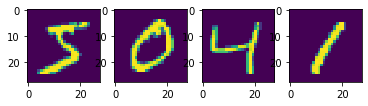

In [37]:
fig = plt.figure()
ax = fig.add_subplot(141)
ax.imshow(x_train[0])
ax = fig.add_subplot(142)
ax.imshow(x_train[1])
ax = fig.add_subplot(143)
ax.imshow(x_train[2])
ax = fig.add_subplot(144)
ax.imshow(x_train[3])
y_train[0:4]

array([7, 2, 1, 0], dtype=uint8)

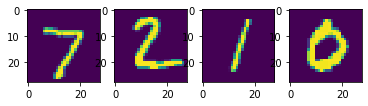

In [38]:
fig = plt.figure()
ax = fig.add_subplot(141)
ax.imshow(x_test[0])
ax = fig.add_subplot(142)
ax.imshow(x_test[1])
ax = fig.add_subplot(143)
ax.imshow(x_test[2])
ax = fig.add_subplot(144)
ax.imshow(x_test[3])
y_test[0:4]

In [58]:
pred = model(x_test[:4]).numpy()

In [59]:
pred

array([[-2.9121890e+00, -9.7359762e+00, -3.2127469e+00,  1.4143454e+00,
        -1.4279735e+01, -4.0315242e+00, -1.9902447e+01,  1.0627968e+01,
        -5.7728100e+00, -1.8160933e+00],
       [-6.1930108e+00,  6.8334657e-01,  1.3126531e+01,  5.6871504e-01,
        -1.7651543e+01, -4.8805723e+00, -7.8121114e+00, -1.6719976e+01,
        -5.8837662e+00, -1.6025826e+01],
       [-6.3094296e+00,  6.3877168e+00, -2.2098579e+00, -5.3855424e+00,
        -2.3868792e+00, -5.8329668e+00, -4.2143788e+00, -1.5031822e-02,
        -5.4737002e-01, -6.0880232e+00],
       [ 1.0441850e+01, -1.3953751e+01, -1.7791746e+00, -5.4727654e+00,
        -7.8337135e+00, -4.2939625e+00, -3.0020092e+00, -2.8040042e+00,
        -9.1979256e+00, -3.8078625e+00]], dtype=float32)

tf.softmax(pred)

In [60]:
tf.nn.softmax(pred)

<tf.Tensor: shape=(4, 10), dtype=float32, numpy=
array([[1.3168557e-06, 1.4322038e-09, 9.7500731e-07, 9.9661760e-05,
        1.5229148e-11, 4.2994910e-07, 5.5050741e-14, 9.9989355e-01,
        7.5367907e-08, 3.9406386e-06],
       [4.0702988e-09, 3.9444881e-06, 9.9999249e-01, 3.5172784e-06,
        4.2978353e-14, 1.5122071e-08, 8.0623164e-10, 1.0909956e-13,
        5.5453651e-09, 2.1841867e-13],
       [3.0506515e-06, 9.9699557e-01, 1.8399846e-04, 7.6847855e-06,
        1.5414679e-04, 4.9126697e-06, 2.4789148e-05, 1.6520182e-03,
        9.7011524e-04, 3.8066942e-06],
       [9.9999082e-01, 2.5416856e-11, 4.9257519e-06, 1.2256494e-07,
        1.1561659e-08, 3.9839520e-07, 1.4501142e-06, 1.7676447e-06,
        2.9549518e-09, 6.4777578e-07]], dtype=float32)>

In [62]:
tf.argmax(tf.nn.softmax(pred),axis=1)

<tf.Tensor: shape=(4,), dtype=int64, numpy=array([7, 2, 1, 0])>

In [63]:
# Other investigations

In [64]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [73]:
tf.math.reduce_max(x_train)

<tf.Tensor: shape=(), dtype=uint8, numpy=255>

In [74]:
tf.math.reduce_min(y_train)

<tf.Tensor: shape=(), dtype=uint8, numpy=0>

In [ ]:
## That's why we normalize at the beginning, so each value is between 0 and 1